In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 1.	Explore the Datafile , List the column names and understand the datatypes. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 2.	Classify the Columns into categorical and numerical.

In [5]:
cat_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtypes=='object':
        cat_col.append(i)
    else:
        num_col.append(i)
print('Categorical columns in the data:\n',cat_col)        
print('Numerical columns in the data:\n',num_col) 

Categorical columns in the data:
 ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
Numerical columns in the data:
 ['math score', 'reading score', 'writing score']


# 3.	Display the descriptive statistics for the numerical columns of the dataset.

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# 4.	Display the Quartiles for the numerical columns of the dataset. 

In [7]:
print('Q1',df.describe().loc['25%'])
print('Q2',df.describe().loc['50%'])
print('Q3',df.describe().loc['75%'])

Q1 math score       57.00
reading score    59.00
writing score    57.75
Name: 25%, dtype: float64
Q2 math score       66.0
reading score    70.0
writing score    69.0
Name: 50%, dtype: float64
Q3 math score       77.0
reading score    79.0
writing score    79.0
Name: 75%, dtype: float64


# 5.	Calculate the correlation between the numerical columns of the dataset. Use graphs as well.

In [8]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


<AxesSubplot:>

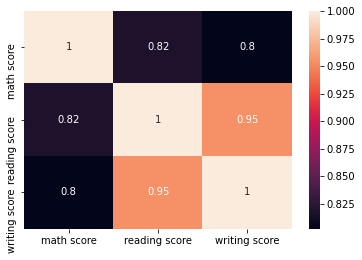

In [9]:
sns.heatmap(df.corr(),annot=True)

# 6.	List out the columns with highest correlation values.

In [10]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74


In [11]:
df[['math score','reading score']].corr()

,math score,reading score
math score,1.00000,0.81758
reading score,0.81758,1.00000


In [12]:
df[['math score','writing score']].corr()

,math score,writing score
math score,1.000000,0.802642
writing score,0.802642,1.000000


In [13]:
df[['writing score','reading score']].corr()

,writing score,reading score
writing score,1.000000,0.954598
reading score,0.954598,1.000000


#### solution : columns with highest correlation values are reading score, writing score.

# 7.	Using graphs visualize the spread of the data for numerical columns.

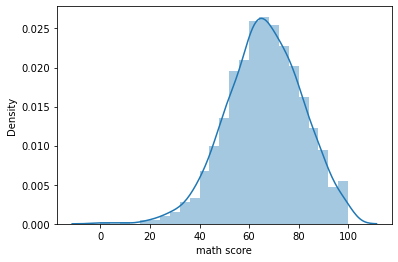

In [14]:
sns.distplot(df['math score'])
plt.show()

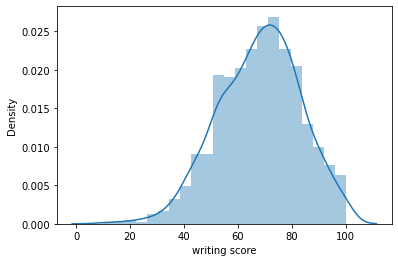

In [15]:
sns.distplot(df['writing score'])
plt.show()

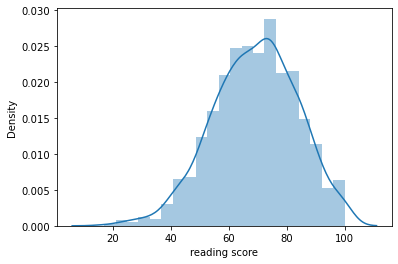

In [16]:
sns.distplot(df['reading score'])
plt.show()

# 8.	Perform univariate analysis using various graphical representations. 

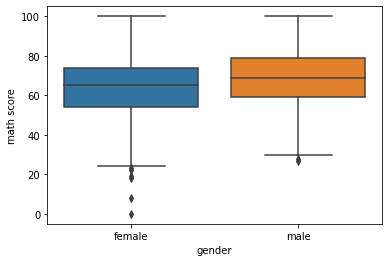

In [17]:
sns.boxplot(x='gender', y='math score', data=df)
plt.show()

##### we observe that the max math score for both male and female are almost same. Most of the female math scores and males math score are almost same, with males slightly having a little better marks. In case of females we have more outliers on the down side which indicates there are few females who were not good in maths.

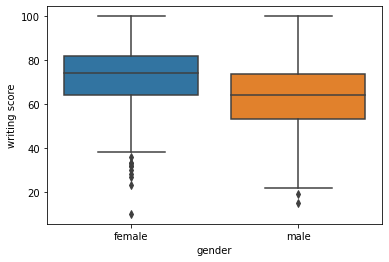

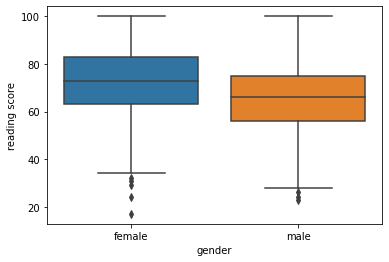

In [18]:
sns.boxplot(x='gender', y='writing score', data=df)
plt.show()
sns.boxplot(x='gender', y='reading score', data=df)
plt.show()

#### We observe that spread of females having scores in writing and reading is compact with most of females(within the IQR) having better scores than most of male. But there are more outliers in case of female than male.

<Figure size 1296x432 with 0 Axes>

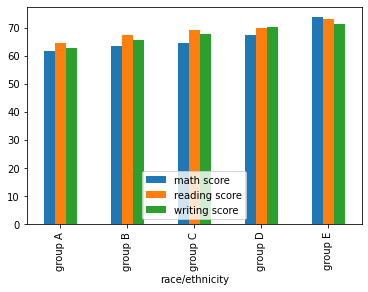

In [19]:
plt.figure(figsize=(18,6))
df.groupby('race/ethnicity')['math score','reading score','writing score'].mean().plot(kind='bar')
plt.show()

#### The avg score of students of race group E is better compared to rest in all the subjects.

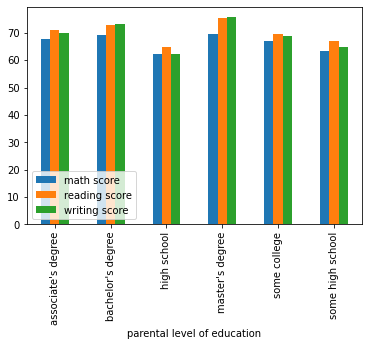

In [20]:
df.groupby('parental level of education')['math score','reading score','writing score'].mean().plot(kind='bar')
plt.legend(loc='lower left')
plt.show()

#### The students having associate degree, bachelors degree, master's degree have almost the same avg score in maths and perform better than other degree holders. The over all performance in all three subjects were better for master degree holder